## Basic Imports & Display Options

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

*Requirements for Logistic Regression*

1.  **Binary Target:** The dependent variable must have exactly two possible outcomes.(check)
2.  **No Missing Data:** The dataset cannot have any missing values in its features or target.(check)
3.  **Numerical Features:** All predictor variables must be in a numerical format.(check)
4.  **No Perfect Multicollinearity:** No feature can be a perfect linear combination of other features.(check)
5.  **Independent Observations:** Data points must not be influenced by or related to each other.(check)
6.  **Limited Outliers:** The model should not be trained on data with extreme, influential outliers.(assumed)
7.  **Adequate Sample Size:** You need significantly more data points than features to avoid overfitting.(check)
8.  **Feature Scaling:** Features must be standardized or normalized for reliable and efficient model fitting.(check)
9.  **Address Class Imbalance:** The model requires balancing techniques if one outcome class is much rarer than the other.(check)

As we go along this code these requirements will be checked in order to feed the data into the model for good prediction.

## Basic EDA

In [3]:
df = pd.read_csv('company_bankruptcy_prediction.csv')
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [4]:
#remove all leading and trailing spaces from column names and all lowercase
df.columns = df.columns.str.strip().str.lower()
df.head()

bankrupt?  roa(c) before interest and depreciation before interest  \
0          1                                           0.370594         
1          1                                           0.464291         
2          1                                           0.426071         
3          1                                           0.399844         
4          1                                           0.465022         

   roa(a) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   roa(b) before interest and depreciation after tax  operating gross margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   realized sales gross margin  operating profit rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   pre-tax net interest rate  after-tax net interest rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   continuous interest rate (after tax)  operating expense rate  \
0                              0.780985            1.256969e-04   
1                              0.781506            2.897851e-04   
2                              0.780284            2.361297e-04   
3                              0.781241            1.078888e-04   
4                              0.781550            7.890000e+09   

   research and development expense rate  cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   interest-bearing debt interest rate  tax rate (a)  net value per share (b)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   net value per share (a)  net value per share (c)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   persistent eps in the last four seasons  cash flow per share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   
2                 

In [5]:
df.shape

(6819, 96)

In [6]:
df['bankrupt?'].value_counts()

bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [7]:
#percentage of bankrupt companies
df['bankrupt?'].value_counts()/len(df) * 100

bankrupt?
0    96.77372
1     3.22628
Name: count, dtype: float64

C:\Users\Jones\AppData\Local\Temp\ipykernel_8612\3460692635.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='bankrupt?', data=df, palette='husl')


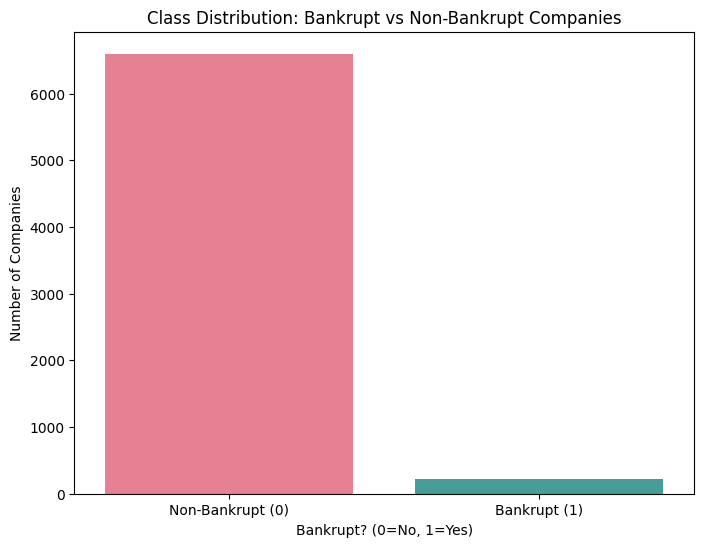

In [8]:
# Class imbalance distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='bankrupt?', data=df, palette='husl')
plt.title('Class Distribution: Bankrupt vs Non-Bankrupt Companies')
plt.xlabel('Bankrupt? (0=No, 1=Yes)')
plt.ylabel('Number of Companies')
plt.xticks([0, 1], ['Non-Bankrupt (0)', 'Bankrupt (1)'])
plt.show()

As you see there is a high class imbalance in this dataset and we will tackle it through SMOTE.

2.  **No Missing Data:** The dataset cannot have any missing values in its features or target. (check)

In [9]:
df.isnull().sum()

bankrupt?                                                  0
roa(c) before interest and depreciation before interest    0
roa(a) before interest and % after tax                     0
roa(b) before interest and depreciation after tax          0
operating gross margin                                     0
realized sales gross margin                                0
operating profit rate                                      0
pre-tax net interest rate                                  0
after-tax net interest rate                                0
non-industry income and expenditure/revenue                0
continuous interest rate (after tax)                       0
operating expense rate                                     0
research and development expense rate                      0
cash flow rate                                             0
interest-bearing debt interest rate                        0
tax rate (a)                                               0
net value per share (b) 

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

bankrupt?                                                     2
roa(c) before interest and depreciation before interest    3333
roa(a) before interest and % after tax                     3151
roa(b) before interest and depreciation after tax          3160
operating gross margin                                     3781
realized sales gross margin                                3788
operating profit rate                                      3376
pre-tax net interest rate                                  3789
after-tax net interest rate                                3604
non-industry income and expenditure/revenue                2551
continuous interest rate (after tax)                       3617
operating expense rate                                     2966
research and development expense rate                      1536
cash flow rate                                             5557
interest-bearing debt interest rate                        1080
tax rate (a)                            

In [12]:
df['net income flag'].value_counts()

net income flag
1    6819
Name: count, dtype: int64

In [13]:
#remove net income flag column as it is not useful for prediction as it only has one unique value
df = df.drop(columns=['net income flag'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt?                                                6819 non-null   int64  
 1   roa(c) before interest and depreciation before interest  6819 non-null   float64
 2   roa(a) before interest and % after tax                   6819 non-null   float64
 3   roa(b) before interest and depreciation after tax        6819 non-null   float64
 4   operating gross margin                                   6819 non-null   float64
 5   realized sales gross margin                              6819 non-null   float64
 6   operating profit rate                                    6819 non-null   float64
 7   pre-tax net interest rate                                6819 non-null   float64
 8   after-tax net interest rate 

All the variables we have are numerical and so it checks one of the requirements for Logistic Regression. 

In [15]:
df.describe()

bankrupt?  roa(c) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000         
mean      0.032263                                           0.505180         
std       0.176710                                           0.060686         
min       0.000000                                           0.000000         
25%       0.000000                                           0.476527         
50%       0.000000                                           0.502706         
75%       0.000000                                           0.535563         
max       1.000000                                           1.000000         

       roa(a) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       roa(b) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       operating gross margin  realized sales gross margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       operating profit rate  pre-tax net interest rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       after-tax net interest rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       non-industry income and expenditure/revenue  \
count                                  6819.000000   
mean                                      0.303623   
std                                       0.011163   
min                                       0.000000   
25%                                       0.303466   
50%                                       0.303525   
75%                                       0.303585   
max                                       1.000000   

       continuous interest rate (after tax)  operating expense rate  \
count                           6819.000000            6.819000e+03   
mean                               0.781381            1.995347e+09   
std                                0.012679            3.237684e+09   
min                                0.000000            0.000000e+00   
25%                                0.7

4.  **No Perfect Multicollinearity:** No feature can be a perfect linear combination of other features.

In [16]:
#correlation matrix
corr = df.corr()
plt.figure(figsize=(200, 150))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Many features have perfect linearity, lets handle that with **VIF (Variance Inflation Factor)**.  
VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity (correlation) with other features in the model.  
So we need to drop columns some at a time to get VIF under 10 for all columns which is good for logistic regression.

## Train-Test Split

We perform the **Train-Test Split** before any preprocessing and then clean and preprocess the training data only which avoids data leakage.

In [17]:
# Split the data first
X = df.drop('bankrupt?', axis=1)
y = df['bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nTraining class distribution:")
print(y_train.value_counts())

Training set shape: (5455, 94)
Test set shape: (1364, 94)

Training class distribution:
bankrupt?
0    5279
1     176
Name: count, dtype: int64


## Variance Inflation Factor (VIF) Analysis & fixing the Colinearity issue.

In [18]:
# Remove 'bankrupt?' from the TRAINING features before calculating VIF
features_df = X_train.copy()  # Use training data only

Define 2 functions, one calculates the vif of all the features and lists out their vif with the names of the column whose vif is higher than a given threshold (in our case 10). The second function drops the columns with the vif higher than a certain defined threshold.

In [19]:
def calculate_vif(df):    
    print("VIF for all features:")
    
    # Calculate and display VIF for each feature
    for i, column in enumerate(df.columns):
        vif = variance_inflation_factor(df.values, i)
        print(f"{column:<60} : {vif:>10.2f}")
    
    # Show summary of high VIF features
    high_vif_features = []
    for i, column in enumerate(df.columns):
        vif = variance_inflation_factor(df.values, i)
        if vif > 10:
            high_vif_features.append((column, vif))
    
    if high_vif_features:
        print(f"\nFeatures with VIF > 10 ({len(high_vif_features)} features):")
        for feature, vif in sorted(high_vif_features, key=lambda x: x[1], reverse=True):
            print(f"{feature:<60} : {vif:>10.2f}")
    else:
        print("\nNo features with VIF > 10 - Good!")

In [20]:
def drop_high_vif_features(df, vif_threshold):
    
    features_to_drop = []
    
    # Calculate VIF and identify features to drop
    for i, column in enumerate(df.columns):
        vif = variance_inflation_factor(df.values, i)
        if vif > vif_threshold:
            features_to_drop.append(column)
    
    # Drop features
    if features_to_drop:
        df.drop(features_to_drop, axis=1, inplace=True)
    
    return features_to_drop

Now we go on a series of calculating the VIF, looking at the values and dropping some at a time higher than a certain threshold.  
This is done because we cannot at once drop all the features with a VIF higher than 10 as some factors might influence the others as in removing one of the variables might affect the others VIF.

In [21]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :      91.75
roa(a) before interest and % after tax                       :      51.15
roa(b) before interest and depreciation after tax            :     154.92
operating gross margin                                       : 59014374.78
realized sales gross margin                                  :    1169.49
operating profit rate                                        : 88346515.31
pre-tax net interest rate                                    : 59336717.88
after-tax net interest rate                                  :   10794.38
non-industry income and expenditure/revenue                  : 4093733.95
continuous interest rate (after tax)                         :    8241.38
operating expense rate                                       :       1.28
research and development expense rate                        :       1.09
cash flow rate                                               :       7.51
interest-bear

In [22]:
drop_high_vif_features(features_df, vif_threshold=1000000)

['operating gross margin',
 'operating profit rate',
 'pre-tax net interest rate',
 'non-industry income and expenditure/revenue',
 'debt ratio %',
 'net worth/assets',
 'working capital to total assets',
 'current assets/total assets',
 'current liability to assets',
 'current liabilities/liability',
 'current liabilities/equity',
 'current liability to liability',
 'current liability to equity',
 'gross profit to sales']

In [23]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :      83.04
roa(a) before interest and % after tax                       :      47.20
roa(b) before interest and depreciation after tax            :     139.18
realized sales gross margin                                  :       2.57
after-tax net interest rate                                  :    4043.92
continuous interest rate (after tax)                         :    4490.28
operating expense rate                                       :       1.27
research and development expense rate                        :       1.08
cash flow rate                                               :       6.29
interest-bearing debt interest rate                          :       1.05
tax rate (a)                                                 :       1.32
net value per share (b)                                      :    2338.90
net value per share (a)                                      :    6012.88
net value per sh

In [24]:
drop_high_vif_features(features_df, 1000)

['after-tax net interest rate',
 'continuous interest rate (after tax)',
 'net value per share (b)',
 'net value per share (a)',
 'net value per share (c)',
 'operating profit per share (yuan ¥)',
 'operating profit/paid-in capital']

In [25]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :      80.10
roa(a) before interest and % after tax                       :      44.75
roa(b) before interest and depreciation after tax            :     131.03
realized sales gross margin                                  :    3192.17
operating expense rate                                       :       1.27
research and development expense rate                        :       1.07
cash flow rate                                               :       6.17
interest-bearing debt interest rate                          :       1.04
tax rate (a)                                                 :       1.31
persistent eps in the last four seasons                      :      61.55
cash flow per share                                          :       4.65
revenue per share (yuan ¥)                                   :       1.95
per share net profit before tax (yuan ¥)                     :      46.04
realized sales g

In [26]:
drop_high_vif_features(features_df, 500)

['realized sales gross margin', 'operating funds to liability']

In [27]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :    5638.74
roa(a) before interest and % after tax                       :    3284.88
roa(b) before interest and depreciation after tax            :   10709.97
operating expense rate                                       :       1.26
research and development expense rate                        :       1.07
cash flow rate                                               :    2464.27
interest-bearing debt interest rate                          :       1.07
tax rate (a)                                                 :       2.19
persistent eps in the last four seasons                      :    3207.68
cash flow per share                                          :       4.64
revenue per share (yuan ¥)                                   :       1.89
per share net profit before tax (yuan ¥)                     :    1633.42
realized sales gross profit growth rate                      :      99.44
operating profit

In [28]:
drop_high_vif_features(features_df, 100000)

['after-tax net profit growth rate', 'regular net profit growth rate']

In [29]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :      79.56
roa(a) before interest and % after tax                       :      44.42
roa(b) before interest and depreciation after tax            :     130.39
operating expense rate                                       :       1.26
research and development expense rate                        :       1.07
cash flow rate                                               :       2.72
interest-bearing debt interest rate                          :       1.04
tax rate (a)                                                 :       1.31
persistent eps in the last four seasons                      :      61.37
cash flow per share                                          :       4.63
revenue per share (yuan ¥)                                   :       1.89
per share net profit before tax (yuan ¥)                     :      45.92
realized sales gross profit growth rate                      :       1.07
operating profit

In [30]:
drop_high_vif_features(features_df, 70000)

['operating profit growth rate']

In [31]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :    5607.09
roa(a) before interest and % after tax                       :    3224.31
roa(b) before interest and depreciation after tax            :   10571.46
operating expense rate                                       :       1.25
research and development expense rate                        :       1.07
cash flow rate                                               :    2458.52
interest-bearing debt interest rate                          :       1.07
tax rate (a)                                                 :       2.18
persistent eps in the last four seasons                      :    3171.94
cash flow per share                                          :       4.63
revenue per share (yuan ¥)                                   :       1.89
per share net profit before tax (yuan ¥)                     :    1613.29
realized sales gross profit growth rate                      :      96.44
continuous net p

In [32]:
drop_high_vif_features(features_df, vif_threshold=10000)

['roa(b) before interest and depreciation after tax',
 'borrowing dependency',
 'inventory and accounts receivable/net value',
 'working capital/equity',
 'net income to total assets',
 "net income to stockholder's equity",
 'liability to equity']

In [33]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :      12.52
roa(a) before interest and % after tax                       :      12.79
operating expense rate                                       :       1.69
research and development expense rate                        :       1.66
cash flow rate                                               :       2.49
interest-bearing debt interest rate                          :       1.04
tax rate (a)                                                 :       1.22
persistent eps in the last four seasons                      :      33.28
cash flow per share                                          :       4.31
revenue per share (yuan ¥)                                   :       1.82
per share net profit before tax (yuan ¥)                     :      43.72
realized sales gross profit growth rate                      :       1.03
continuous net profit growth rate                            :       1.02
total asset grow

In [34]:
drop_high_vif_features(features_df, vif_threshold=1000)

['retained earnings to total assets',
 'no-credit interval',
 'interest coverage ratio (interest expense to ebit)']

In [35]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :      12.46
roa(a) before interest and % after tax                       :      11.78
operating expense rate                                       :       1.22
research and development expense rate                        :       1.06
cash flow rate                                               :       2.47
interest-bearing debt interest rate                          :       1.04
tax rate (a)                                                 :       1.22
persistent eps in the last four seasons                      :      33.26
cash flow per share                                          :       4.31
revenue per share (yuan ¥)                                   :       1.82
per share net profit before tax (yuan ¥)                     :      43.71
realized sales gross profit growth rate                      :       1.03
continuous net profit growth rate                            :       1.02
total asset grow

In [36]:
drop_high_vif_features(features_df, vif_threshold=1000)

['working capitcal turnover rate', 'cash flow to sales']

In [37]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :      12.45
roa(a) before interest and % after tax                       :     869.43
operating expense rate                                       :       1.67
research and development expense rate                        :       1.65
cash flow rate                                               :       2.28
interest-bearing debt interest rate                          :       1.04
tax rate (a)                                                 :       1.22
persistent eps in the last four seasons                      :      33.24
cash flow per share                                          :       4.28
revenue per share (yuan ¥)                                   :       1.77
per share net profit before tax (yuan ¥)                     :      43.68
realized sales gross profit growth rate                      :       1.03
continuous net profit growth rate                            :       1.01
total asset grow

In [38]:
drop_high_vif_features(features_df, vif_threshold=100)

['roa(a) before interest and % after tax',
 'inventory/working capital',
 'cash flow to liability']

In [39]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :     320.79
operating expense rate                                       :       1.66
research and development expense rate                        :       1.65
cash flow rate                                               :    1874.45
interest-bearing debt interest rate                          :       1.06
tax rate (a)                                                 :       2.00
persistent eps in the last four seasons                      :    1725.44
cash flow per share                                          :       4.21
revenue per share (yuan ¥)                                   :       1.73
per share net profit before tax (yuan ¥)                     :    1542.17
realized sales gross profit growth rate                      :      95.22
continuous net profit growth rate                            :     376.96
total asset growth rate                                      :       5.04
net value growth

In [40]:
drop_high_vif_features(features_df, vif_threshold=1000)

['cash flow rate',
 'persistent eps in the last four seasons',
 'per share net profit before tax (yuan ¥)',
 'total asset return growth rate ratio',
 'cash reinvestment %',
 'net profit before tax/paid-in capital',
 'cash flow to equity']

In [41]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :       1.99
operating expense rate                                       :       1.21
research and development expense rate                        :       1.05
interest-bearing debt interest rate                          :       1.04
tax rate (a)                                                 :       1.13
cash flow per share                                          :       2.25
revenue per share (yuan ¥)                                   :       1.54
realized sales gross profit growth rate                      :       1.00
continuous net profit growth rate                            :       0.92
total asset growth rate                                      :       4.93
net value growth rate                                        :       2.11
current ratio                                                :       2.58
quick ratio                                                  :       1.03
interest expense

In [42]:
drop_high_vif_features(features_df, vif_threshold=10)

['interest expense ratio']

In [43]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :     140.44
operating expense rate                                       :       1.66
research and development expense rate                        :       1.65
interest-bearing debt interest rate                          :       1.06
tax rate (a)                                                 :       1.89
cash flow per share                                          :     657.08
revenue per share (yuan ¥)                                   :       1.54
realized sales gross profit growth rate                      :      90.08
continuous net profit growth rate                            :     280.16
total asset growth rate                                      :       4.91
net value growth rate                                        :       2.11
current ratio                                                :       3.66
quick ratio                                                  :       1.03
total debt/total

In [44]:
drop_high_vif_features(features_df, vif_threshold=100)

['roa(c) before interest and depreciation before interest',
 'cash flow per share',
 'continuous net profit growth rate',
 'operating profit per person',
 'cash flow to total assets',
 'cfo to assets']

In [45]:
calculate_vif(features_df)

VIF for all features:
operating expense rate                                       :       1.19
research and development expense rate                        :       1.04
interest-bearing debt interest rate                          :       1.03
tax rate (a)                                                 :       1.08
revenue per share (yuan ¥)                                   :       1.53
realized sales gross profit growth rate                      :       0.53
total asset growth rate                                      :       4.65
net value growth rate                                        :       2.07
current ratio                                                :       2.54
quick ratio                                                  :       1.03
total debt/total net worth                                   :       1.18
long-term fund suitability ratio (a)                         :       1.58
contingent liabilities/net worth                             :       1.62
total asset turn

In [46]:
drop_high_vif_features(features_df, vif_threshold=10)

['equity to long-term liability']

In [47]:
calculate_vif(features_df)

VIF for all features:
operating expense rate                                       :       1.63
research and development expense rate                        :       1.61
interest-bearing debt interest rate                          :       1.05
tax rate (a)                                                 :       1.80
revenue per share (yuan ¥)                                   :       1.53
realized sales gross profit growth rate                      :      21.07
total asset growth rate                                      :       4.54
net value growth rate                                        :       2.03
current ratio                                                :       3.60
quick ratio                                                  :       1.03
total debt/total net worth                                   :       1.18
long-term fund suitability ratio (a)                         :       1.73
contingent liabilities/net worth                             :       1.24
total asset turn

In [48]:
drop_high_vif_features(features_df, vif_threshold=10)

['realized sales gross profit growth rate',
 'total asset turnover',
 'quick assets/total assets']

In [49]:
calculate_vif(features_df)

VIF for all features:
operating expense rate                                       :       1.54
research and development expense rate                        :       1.53
interest-bearing debt interest rate                          :       1.05
tax rate (a)                                                 :       1.70
revenue per share (yuan ¥)                                   :       1.51
total asset growth rate                                      :       3.86
net value growth rate                                        :       1.93
current ratio                                                :       3.57
quick ratio                                                  :       1.03
total debt/total net worth                                   :       1.16
long-term fund suitability ratio (a)                         :       1.72
contingent liabilities/net worth                             :       1.23
accounts receivable turnover                                 :       1.08
average collecti

Sometimes, some features pop up with a higher VIF than before when calculated in the last iteration because the other variable that was removed might have a masking effect on this variable's VIF.

In [50]:
# Get current features after all VIF removal from TRAINING data
final_features = features_df.columns.tolist()

# Get original features (before any dropping) from TRAINING data
original_features = X_train.columns.tolist()

# Find what was dropped
dropped_features = list(set(original_features) - set(final_features))

print(f"Dropped {len(dropped_features)} features:")
for feature in dropped_features:
    print(f"  - {feature}")

# Apply the same feature drops to BOTH train and test sets
X_train_clean = X_train.drop(dropped_features, axis=1)
X_test_clean = X_test.drop(dropped_features, axis=1)

print(f"X_train_clean shape: {X_train_clean.shape}")
print(f"X_test_clean shape: {X_test_clean.shape}")

Dropped 59 features:
  - cash reinvestment %
  - interest expense ratio
  - inventory/working capital
  - persistent eps in the last four seasons
  - regular net profit growth rate
  - cash flow rate
  - non-industry income and expenditure/revenue
  - realized sales gross margin
  - net value per share (c)
  - cash flow per share
  - cash flow to sales
  - net value per share (b)
  - equity to long-term liability
  - no-credit interval
  - net profit before tax/paid-in capital
  - current liability to assets
  - per share net profit before tax (yuan ¥)
  - total asset return growth rate ratio
  - roa(c) before interest and depreciation before interest
  - after-tax net profit growth rate
  - working capital to total assets
  - borrowing dependency
  - gross profit to sales
  - inventory and accounts receivable/net value
  - current liabilities/equity
  - roa(b) before interest and depreciation after tax
  - operating profit per share (yuan ¥)
  - current liability to liability
  - work

In [51]:
# Check the shapes of your cleaned training and test sets
print(f"X_train_clean shape: {X_train_clean.shape}")
print(f"X_test_clean shape: {X_test_clean.shape}")

X_train_clean shape: (5455, 35)
X_test_clean shape: (1364, 35)


After VIF we are left with 34 features, so now we will identify the highest correlated pairs through correlation matrix and drop them.

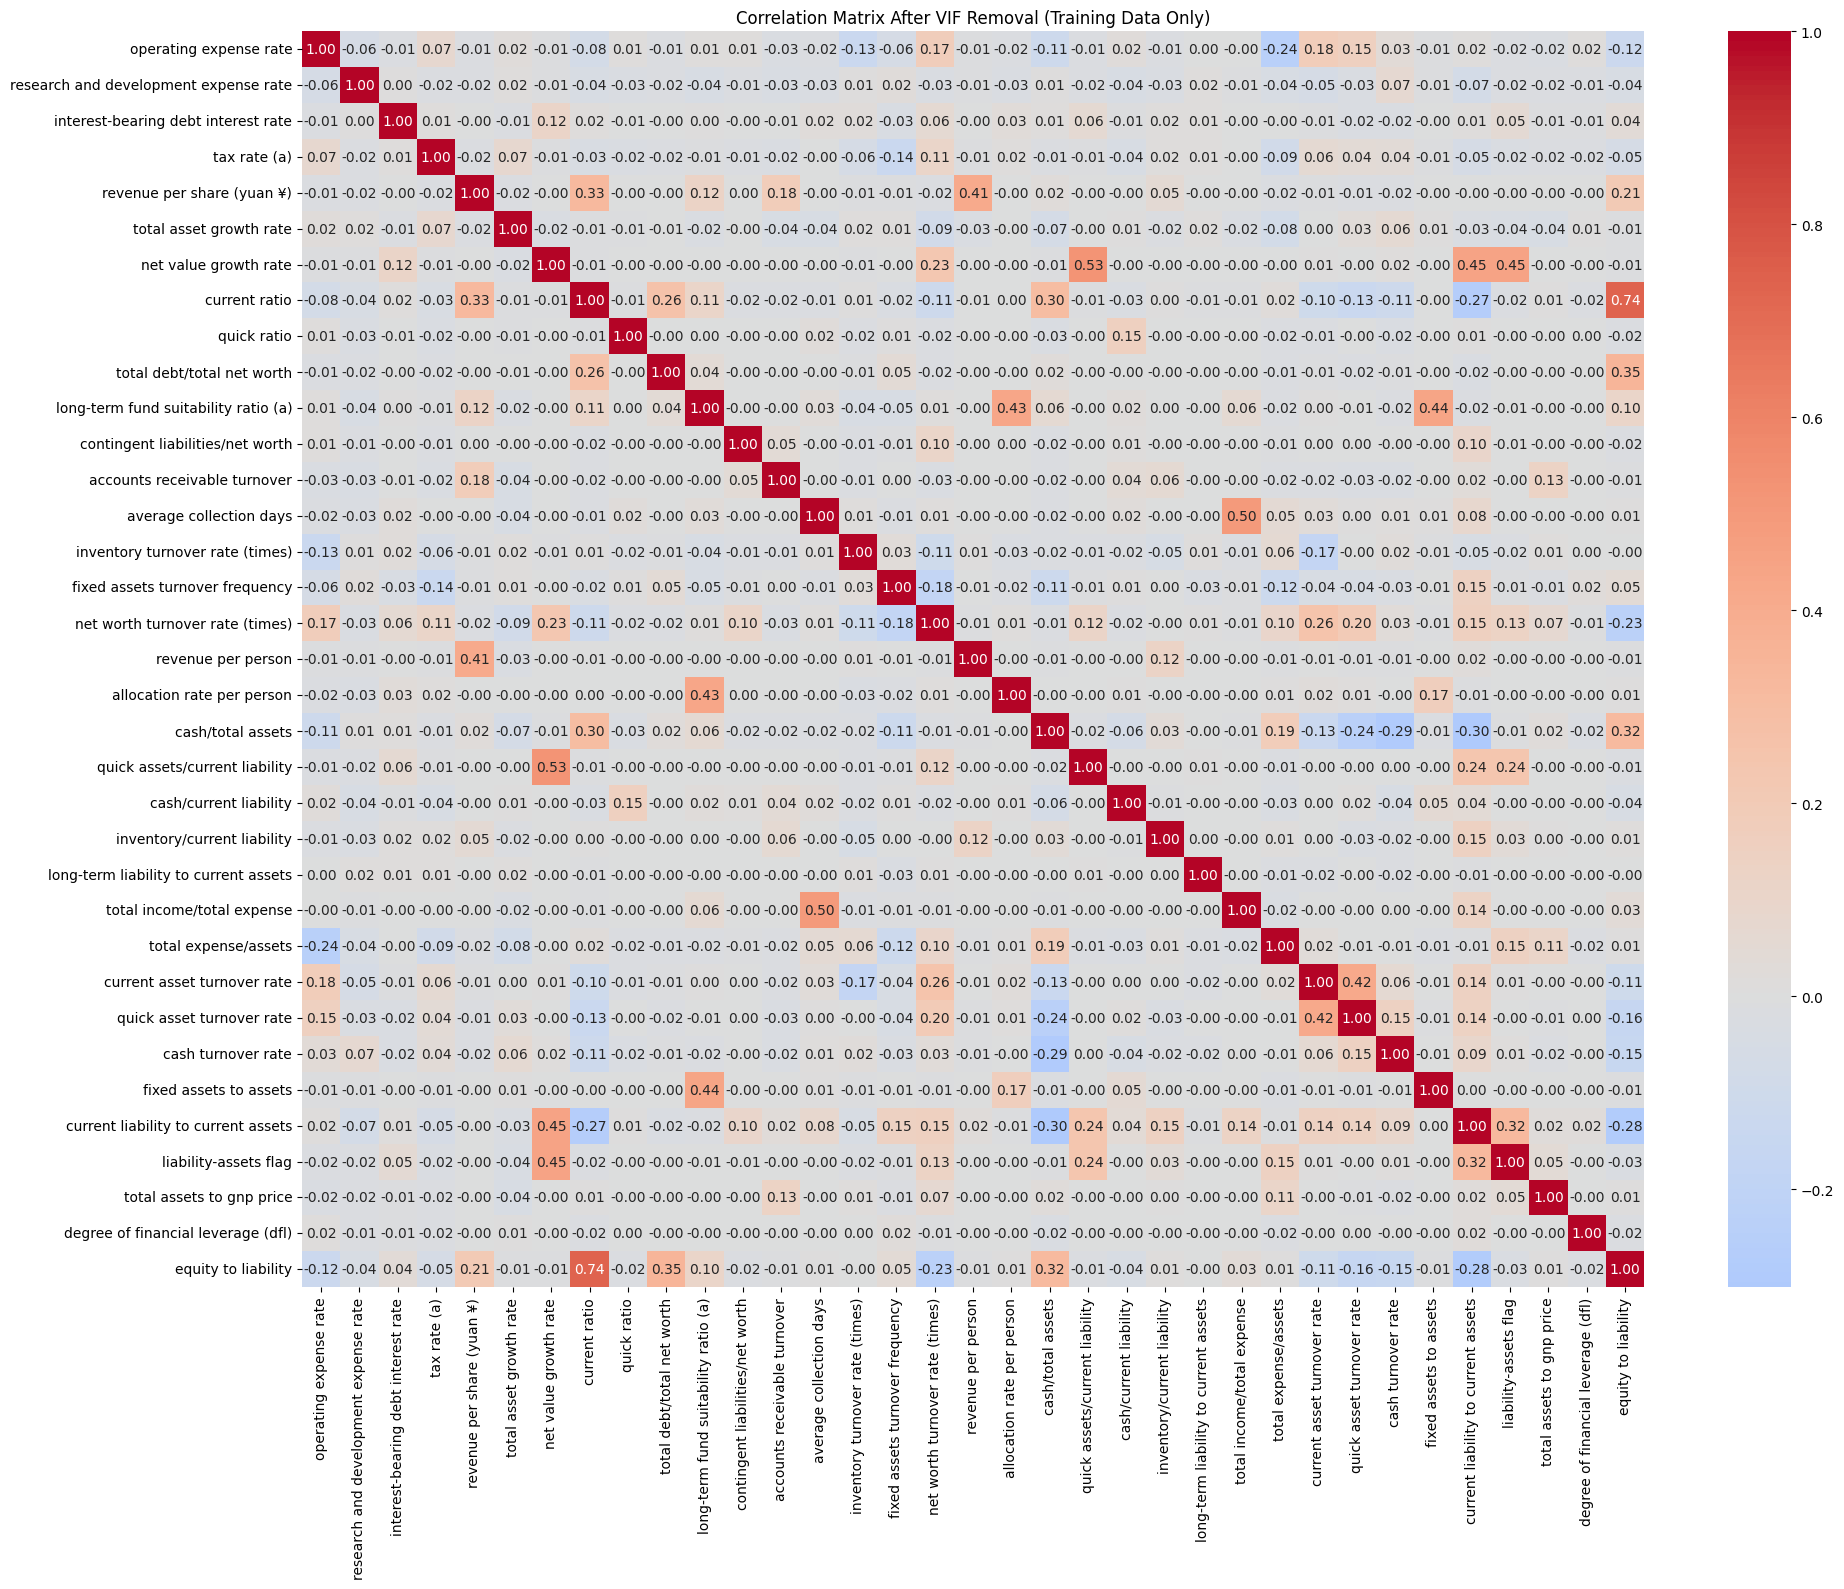

In [52]:
# Calculate correlation matrix for the cleaned training features only
corr_clean = X_train_clean.corr()

# Create a more manageable heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_clean, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix After VIF Removal (Training Data Only)')
plt.tight_layout()
plt.show()

In [53]:
# Find high correlations between features (excluding target) in TRAINING data only
corr_matrix = X_train_clean.corr()
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:  # Adjust threshold as needed
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

print("Severely correlated feature pairs (Training Data):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

Severely correlated feature pairs (Training Data):
equity to liability - current ratio: 0.738


In [54]:
# Drop the problematic and redundant features from BOTH train and test sets
features_to_drop = [
    'equity to liability'               # 0.738 with current ratio
]

X_train_clean = X_train_clean.drop(features_to_drop, axis=1)
X_test_clean = X_test_clean.drop(features_to_drop, axis=1)

print(f"After removing correlated features:")
print(f"X_train_clean shape: {X_train_clean.shape}")
print(f"X_test_clean shape: {X_test_clean.shape}")

After removing correlated features:
X_train_clean shape: (5455, 34)
X_test_clean shape: (1364, 34)


## Outlier Detection and Treatment

6.  **Limited Outliers:** The model should not be trained on data with extreme, influential outliers.(check)

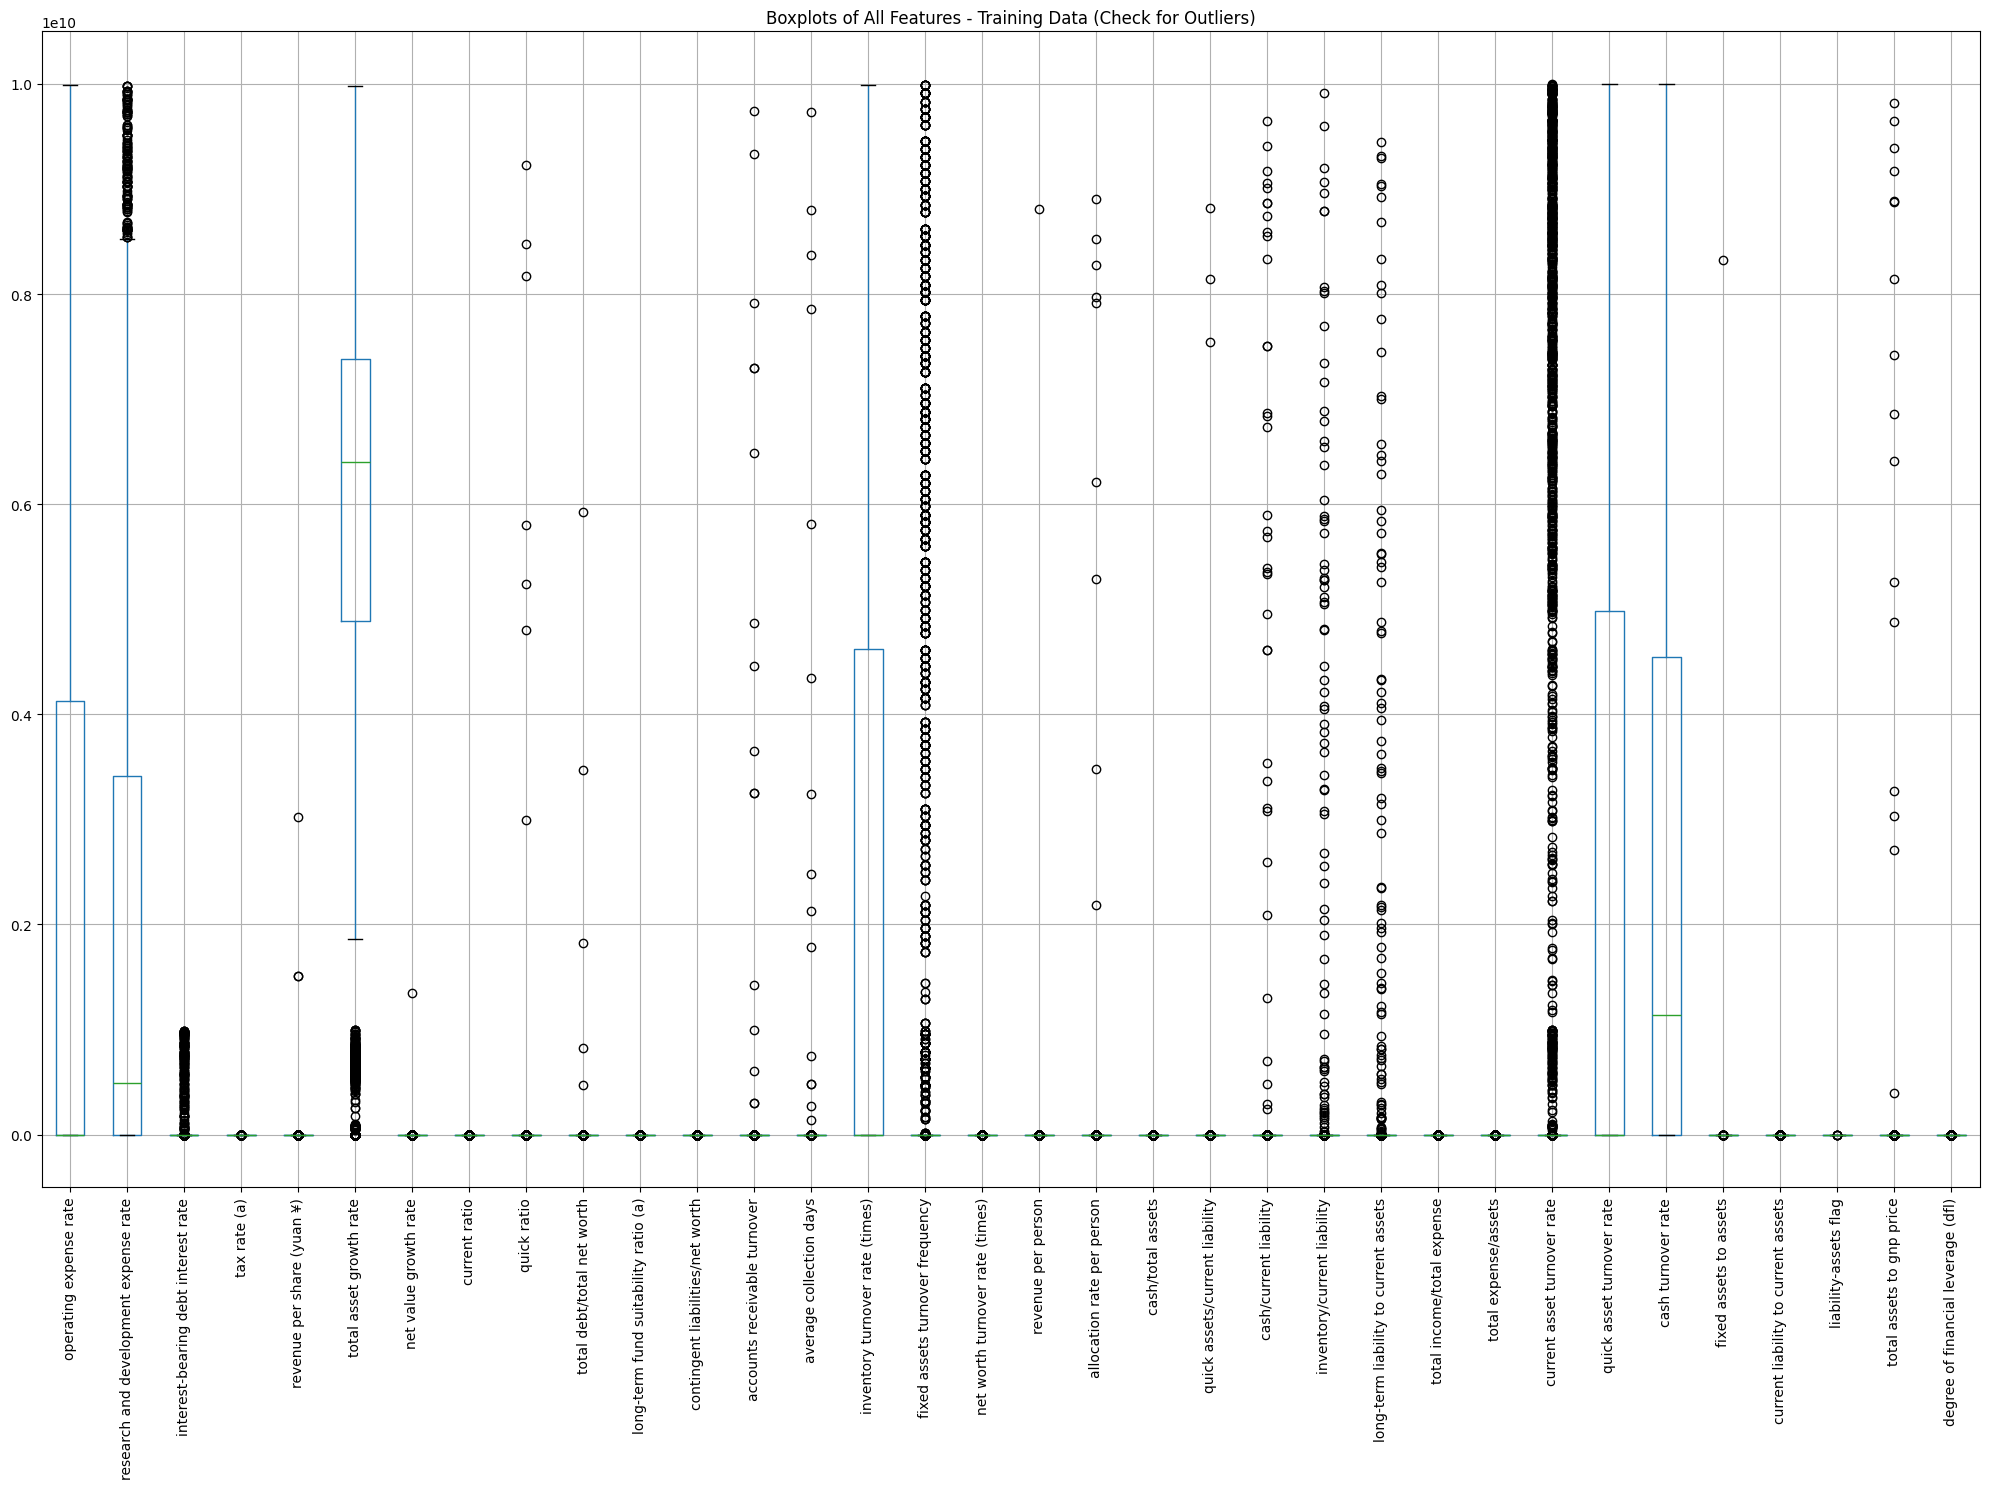

In [55]:
# Create boxplots for all features to visually identify outliers (TRAINING DATA ONLY)
plt.figure(figsize=(20, 15))

# Use the cleaned training data
X_train_clean.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots of All Features - Training Data (Check for Outliers)')
plt.tight_layout()
plt.show()

In [56]:
# Calculate skewness for all features in CLEANED TRAINING DATA only
skewness = X_train_clean.apply(lambda x: x.skew()).sort_values(ascending=False)

print("Feature Skewness Analysis:")
for feature, skew_val in skewness.items():
    if abs(skew_val) > 1:
        print(f"{feature:<50} : {skew_val:>7.2f}")

Feature Skewness Analysis:
fixed assets to assets                             :   73.86
net value growth rate                              :   73.86
revenue per person                                 :   73.86
total income/total expense                         :   73.70
contingent liabilities/net worth                   :   71.85
total debt/total net worth                         :   51.47
revenue per share (yuan ¥)                         :   50.24
quick assets/current liability                     :   42.88
degree of financial leverage (dfl)                 :   41.80
liability-assets flag                              :   32.99
quick ratio                                        :   31.61
average collection days                            :   29.80
allocation rate per person                         :   27.57
long-term fund suitability ratio (a)               :   27.19
accounts receivable turnover                       :   25.71
current ratio                                      :   23.

Now we check the skewness of the variables, based on how high the skewness is we perform suitable transformations.

In [57]:
# Identify non-binary columns (columns with more than 2 unique values) in CLEANED TRAINING DATA
non_binary_columns = []
for column in X_train_clean.columns:
    if X_train_clean[column].nunique() > 2:
        non_binary_columns.append(column)

print(f"Non-binary columns to transform ({len(non_binary_columns)}):")
for col in non_binary_columns:
    print(f"  - {col}")

print(f"\nBinary columns to skip ({len(X_train_clean.columns) - len(non_binary_columns)}):")
binary_columns = [col for col in X_train_clean.columns if col not in non_binary_columns]
for col in binary_columns:
    print(f"  - {col}")

Non-binary columns to transform (33):
  - operating expense rate
  - research and development expense rate
  - interest-bearing debt interest rate
  - tax rate (a)
  - revenue per share (yuan ¥)
  - total asset growth rate
  - net value growth rate
  - current ratio
  - quick ratio
  - total debt/total net worth
  - long-term fund suitability ratio (a)
  - contingent liabilities/net worth
  - accounts receivable turnover
  - average collection days
  - inventory turnover rate (times)
  - fixed assets turnover frequency
  - net worth turnover rate (times)
  - revenue per person
  - allocation rate per person
  - cash/total assets
  - quick assets/current liability
  - cash/current liability
  - inventory/current liability
  - long-term liability to current assets
  - total income/total expense
  - total expense/assets
  - current asset turnover rate
  - quick asset turnover rate
  - cash turnover rate
  - fixed assets to assets
  - current liability to current assets
  - total assets to

We perform **Winsorization** on the positively skewed training data, save the limits and then apply the same on test data.  
This is done to prevent data leakage.

In [58]:
# Store the winsorization limits to apply to test data later
winsorize_limits = {}

for feature in non_binary_columns:
    skew_val = skewness[feature]
    
    if abs(skew_val) > 10:
        limits = [0.10, 0.10]
        X_train_clean[feature] = winsorize(X_train_clean[feature], limits=limits)
        winsorize_limits[feature] = limits
        print(f"Extreme skew {skew_val:>6.2f}: Winsorized 10% - {feature}")
            
    elif abs(skew_val) > 5:
        limits = [0.07, 0.07]
        X_train_clean[feature] = winsorize(X_train_clean[feature], limits=limits)
        winsorize_limits[feature] = limits
        print(f"High skew {skew_val:>6.2f}: Winsorized 7% - {feature}")
        
    elif abs(skew_val) > 2:
        limits = [0.05, 0.05]
        X_train_clean[feature] = winsorize(X_train_clean[feature], limits=limits)
        winsorize_limits[feature] = limits
        print(f"Moderate skew {skew_val:>6.2f}: Winsorized 5% - {feature}")
        
    elif abs(skew_val) > 1:
        limits = [0.03, 0.03]
        X_train_clean[feature] = winsorize(X_train_clean[feature], limits=limits)
        winsorize_limits[feature] = limits
        print(f"Mild skew {skew_val:>6.2f}: Winsorized 3% - {feature}")

Mild skew   1.26: Winsorized 3% - operating expense rate
Mild skew   1.28: Winsorized 3% - research and development expense rate
High skew   7.04: Winsorized 7% - interest-bearing debt interest rate
Mild skew   1.92: Winsorized 3% - tax rate (a)
Extreme skew  50.24: Winsorized 10% - revenue per share (yuan ¥)
Extreme skew  73.86: Winsorized 10% - net value growth rate
Extreme skew  23.11: Winsorized 10% - current ratio
Extreme skew  31.61: Winsorized 10% - quick ratio
Extreme skew  51.47: Winsorized 10% - total debt/total net worth
Extreme skew  27.19: Winsorized 10% - long-term fund suitability ratio (a)
Extreme skew  71.85: Winsorized 10% - contingent liabilities/net worth
Extreme skew  25.71: Winsorized 10% - accounts receivable turnover
Extreme skew  29.80: Winsorized 10% - average collection days
Mild skew   1.14: Winsorized 3% - inventory turnover rate (times)
Moderate skew   2.33: Winsorized 5% - fixed assets turnover frequency
High skew   9.57: Winsorized 7% - net worth turnove

In [59]:
# Apply the same winsorization to test data
for feature, limits in winsorize_limits.items():
    if feature in X_test_clean.columns:
        X_test_clean[feature] = winsorize(X_test_clean[feature], limits=limits)

print("Winsorization applied to test data")

Winsorization applied to test data


Previously we had negatively skewed variables too and so we have the code for log tranformation for the same, but those variables were removed during the VIF analysis.

In [60]:
# Handle negative skew only for non-binary columns in CLEANED TRAINING DATA
negative_skew_transforms = {}

for feature in non_binary_columns:
    skew_val = skewness[feature]
    
    if skew_val < -5:
        # Calculate transformation parameters from CLEANED TRAINING data only
        max_val = X_train_clean[feature].max()
        reflected = max_val - X_train_clean[feature] + 1
        logged = np.log(reflected)
        X_train_clean[feature] = -logged
        
        # Store transformation parameters for test data
        negative_skew_transforms[feature] = max_val
        print(f"Extreme negative skew {skew_val:>6.2f}: Reflect+log - {feature}")

In [61]:
# apply the same transformation to CLEANED test data
for feature, max_val in negative_skew_transforms.items():
    reflected = max_val - X_test_clean[feature] + 1
    logged = np.log(reflected)
    X_test_clean[feature] = -logged

In [62]:
# Calculate skewness for all features in CLEANED TRAINING DATA after transformations
skewness_after = X_train_clean.apply(lambda x: x.skew()).sort_values(ascending=False)

print("Feature Skewness Analysis After Transformations (Training Data - Cleaned Features):")
for feature, skew_val in skewness_after.items():
    print(f"{feature:<50} : {skew_val:>7.2f}")

Feature Skewness Analysis After Transformations (Training Data - Cleaned Features):
liability-assets flag                              :   32.99
fixed assets turnover frequency                    :    2.22
current asset turnover rate                        :    2.07
long-term fund suitability ratio (a)               :    1.43
contingent liabilities/net worth                   :    1.41
cash/total assets                                  :    1.37
total assets to gnp price                          :    1.34
degree of financial leverage (dfl)                 :    1.27
operating expense rate                             :    1.25
cash/current liability                             :    1.24
research and development expense rate              :    1.20
revenue per person                                 :    1.17
long-term liability to current assets              :    1.15
inventory turnover rate (times)                    :    1.12
quick asset turnover rate                          :    1.12
n

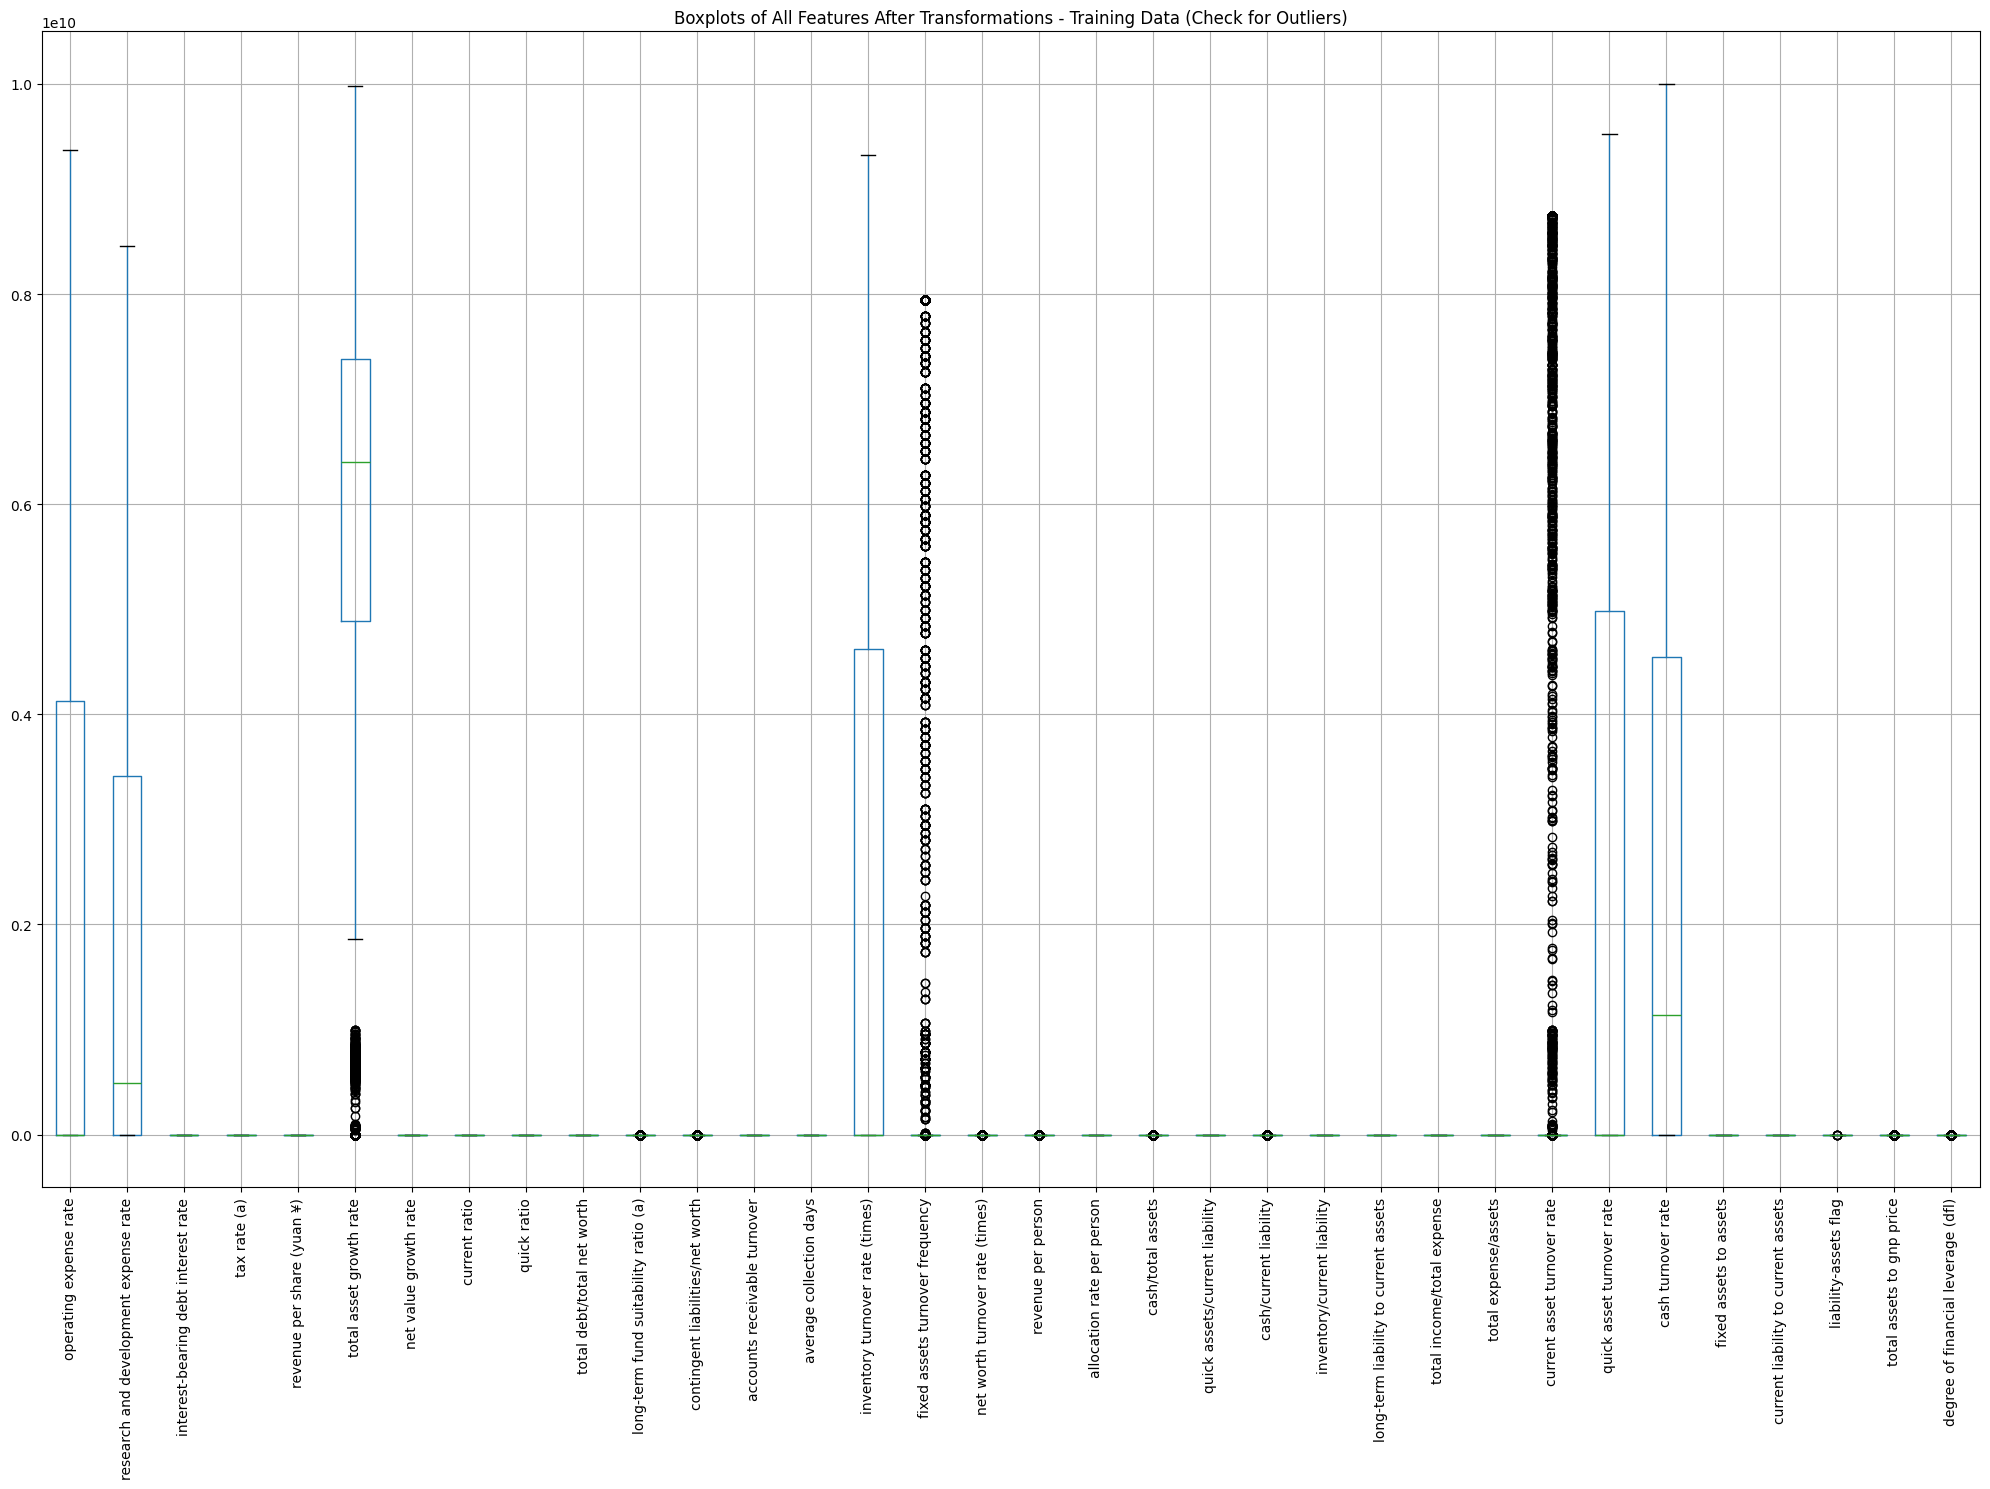

In [63]:
#booxplot after transformations
plt.figure(figsize=(20, 15))
X_train_clean.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots of All Features After Transformations - Training Data (Check for Outliers)')
plt.tight_layout()
plt.show()

Fixed the skewness of the variables and now they are ready for Standardization.  
You can see an anamoly in one of the features with high skewness which is because it is a binary column.

8.  **Feature Scaling:** Features must be standardized or normalized for reliable and efficient model fitting. (check)

In [64]:
# Scale all features in CLEANED training and test data
scaler = StandardScaler()

# Fit on cleaned training data only, then transform both
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_clean)

# Convert back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_clean.columns, index=X_train_clean.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_clean.columns, index=X_test_clean.index)

print("Scaling completed - Training data shape:", X_train_scaled.shape)
print("Test data shape:", X_test_scaled.shape)

Scaling completed - Training data shape: (5455, 34)
Test data shape: (1364, 34)


In [65]:
# Check that scaling worked (mean ~0, std ~1 for scaled features in TRAINING data)
print("After scaling - Training Data Feature statistics:")
for feature in X_train_scaled.columns:
    mean_val = X_train_scaled[feature].mean()
    std_val = X_train_scaled[feature].std()
    print(f"{feature:<40} : mean={mean_val:7.3f}, std={std_val:7.3f}")

# Also check test data statistics (should be close but not exactly 0 and 1)
print("\nTest Data Feature statistics (should be similar):")
for feature in X_test_scaled.columns:
    mean_val = X_test_scaled[feature].mean()
    std_val = X_test_scaled[feature].std()
    print(f"{feature:<40} : mean={mean_val:7.3f}, std={std_val:7.3f}")

After scaling - Training Data Feature statistics:
operating expense rate                   : mean= -0.000, std=  1.000
research and development expense rate    : mean= -0.000, std=  1.000
interest-bearing debt interest rate      : mean=  0.000, std=  1.000
tax rate (a)                             : mean=  0.000, std=  1.000
revenue per share (yuan ¥)               : mean=  0.000, std=  1.000
total asset growth rate                  : mean=  0.000, std=  1.000
net value growth rate                    : mean=  0.000, std=  1.000
current ratio                            : mean=  0.000, std=  1.000
quick ratio                              : mean= -0.000, std=  1.000
total debt/total net worth               : mean=  0.000, std=  1.000
long-term fund suitability ratio (a)     : mean=  0.000, std=  1.000
contingent liabilities/net worth         : mean= -0.000, std=  1.000
accounts receivable turnover             : mean=  0.000, std=  1.000
average collection days                  : mean= -0.0

## Class Imbalance Problem and Fix

9.  **Address Class Imbalance:** The model requires balancing techniques if one outcome class is much rarer than the other.(check)

For this particular part we use 2 types of training datasets, one would be SMOTE transformed dataset and the other one would just be Regular dataset.  
This is done so that we have 2 models trained, one with the SMOTE dataset and the other with Regular dataset but with class_weights added as a hyperparameter.

Class Distribution (Training Data):
Non-Bankrupt (0): 5,279 samples (96.77%)
Bankrupt (1):     176 samples (3.23%)


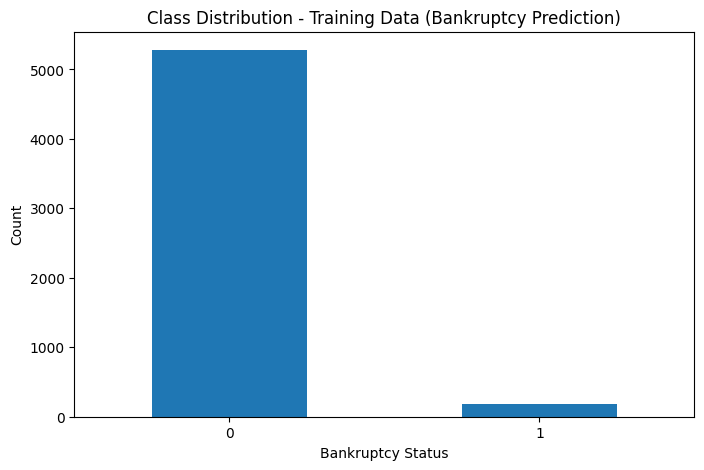

In [66]:
# Check the class distribution in TRAINING DATA
class_distribution = y_train.value_counts()
class_percentage = y_train.value_counts(normalize=True) * 100

print("Class Distribution (Training Data):")
print(f"Non-Bankrupt (0): {class_distribution[0]:,} samples ({class_percentage[0]:.2f}%)")
print(f"Bankrupt (1):     {class_distribution[1]:,} samples ({class_percentage[1]:.2f}%)")

# Visualize
plt.figure(figsize=(8, 5))
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Data (Bankruptcy Prediction)')
plt.xlabel('Bankruptcy Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [67]:
# Apply SMOTE to the ALREADY SCALED training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_balanced.value_counts())

Before SMOTE:
bankrupt?
0    5279
1     176
Name: count, dtype: int64

After SMOTE:
bankrupt?
0    5279
1    5279
Name: count, dtype: int64


## Feature selection with BIC

We will now perform feature selection using **Bayesian Information Criterion(BIC)**.  
This particular method measures model quality vs complexity and generally lower BIC score means better model.

In [68]:
def forward_selection_bic(X, y, significance_level=0.05):
    """Forward feature selection using BIC"""
    included = []
    current_bic = np.inf
    
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        best_bic = current_bic
        best_feature = None
        
        for new_column in excluded:
            # Try adding each new feature
            try_features = included + [new_column]
            X_temp = sm.add_constant(X[try_features])
            
            try:
                # Fit logistic regression
                model = sm.Logit(y, X_temp)
                result = model.fit(disp=0, maxiter=1000)
                
                # Get BIC (lower is better)
                bic = result.bic
                
                # If improved BIC, keep this feature
                if bic < best_bic:
                    best_bic = bic
                    best_feature = new_column
                    changed = True
                    
            except:
                continue
        
        if changed:
            included.append(best_feature)
            print(f"Added {best_feature:.<40} BIC = {best_bic:8.2f} | Features: {len(included)}")
            current_bic = best_bic
        else:
            break
    
    return included

# Apply BIC feature selection to ORIGINAL training data (not SMOTE)
print("=== Forward Selection with BIC (Original Data) ===")
selected_features = forward_selection_bic(X_train_scaled, y_train)

# Then use these features for BOTH approaches
X_train_smote_reduced = X_train_balanced[selected_features]
X_test_smote_reduced = X_test_scaled[selected_features]
X_train_weights_reduced = X_train_scaled[selected_features]
X_test_weights_reduced = X_test_scaled[selected_features]

print(f"\nDataset shapes after feature selection:")
print(f"SMOTE training:  {X_train_smote_reduced.shape}")
print(f"SMOTE test:      {X_test_smote_reduced.shape}")
print(f"Weights training: {X_train_weights_reduced.shape}")
print(f"Weights test:     {X_test_weights_reduced.shape}")

=== Forward Selection with BIC (Original Data) ===
Added total debt/total net worth.............. BIC =  1230.47 | Features: 1
Added total income/total expense.............. BIC =  1038.58 | Features: 2
Added interest-bearing debt interest rate..... BIC =  1015.25 | Features: 3
Added revenue per share (yuan ¥).............. BIC =   995.97 | Features: 4
Added total expense/assets.................... BIC =   993.78 | Features: 5
Added allocation rate per person.............. BIC =   986.49 | Features: 6

Dataset shapes after feature selection:
SMOTE training:  (10558, 6)
SMOTE test:      (1364, 6)
Weights training: (5455, 6)
Weights test:     (1364, 6)


After BIC Forward Selection, we were left with only 6 features that provided a good predictive metrics scores.  
Adding more features to this means that the model gets more complex but there is little to no improvement in model performnce, so adding anymore features is unnecessary.  
Started with 95 features and now we are only left with 6 features.

## Model Training and Testing

One with SMOTE data

In [69]:
# Use the feature-selected datasets from BIC selection
model_smote = LogisticRegression(random_state=42, max_iter=1000)
model_smote.fit(X_train_smote_reduced, y_train_balanced)

# Make predictions once
y_pred_train_smote = model_smote.predict(X_train_smote_reduced)
y_proba_train_smote = model_smote.predict_proba(X_train_smote_reduced)[:, 1]
y_pred_test_smote = model_smote.predict(X_test_smote_reduced)
y_proba_test_smote = model_smote.predict_proba(X_test_smote_reduced)[:, 1]

print(f"=== SMOTE MODEL ({len(selected_features)} Features) ===")

from sklearn.metrics import fbeta_score, precision_recall_curve, auc, confusion_matrix, accuracy_score, roc_auc_score, classification_report

# F2-Score (emphasizes recall)
f2_test = fbeta_score(y_test, y_pred_test_smote, beta=2)

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_proba_test_smote)
pr_auc = auc(recall, precision)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_smote)
TN, FP, FN, TP = cm.ravel()

print("\nTEST PERFORMANCE:")
print(f"F2-Score:           {f2_test:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")
print(f"ROC-AUC:            {roc_auc_score(y_test, y_proba_test_smote):.4f}")
print(f"Accuracy:           {accuracy_score(y_test, y_pred_test_smote):.4f}")
print(f"Confusion Matrix:")
print(f"  True Negatives:  {TN}")
print(f"  False Positives: {FP}")
print(f"  False Negatives: {FN}")
print(f"  True Positives:  {TP}")
print("\nDetailed Report:")
print(classification_report(y_test, y_pred_test_smote))

print("\nTRAINING PERFORMANCE (Reference):")
print(f"Accuracy: {accuracy_score(y_train_balanced, y_pred_train_smote):.4f}")
print(f"ROC-AUC:  {roc_auc_score(y_train_balanced, y_proba_train_smote):.4f}")

=== SMOTE MODEL (6 Features) ===

TEST PERFORMANCE:
F2-Score:           0.4642
Precision-Recall AUC: 0.3334
ROC-AUC:            0.9225
Accuracy:           0.8717
Confusion Matrix:
  True Negatives:  1154
  False Positives: 166
  False Negatives: 9
  True Positives:  35

Detailed Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1320
           1       0.17      0.80      0.29        44

    accuracy                           0.87      1364
   macro avg       0.58      0.83      0.61      1364
weighted avg       0.97      0.87      0.91      1364


TRAINING PERFORMANCE (Reference):
Accuracy: 0.8849
ROC-AUC:  0.9503


One with not balanced but using class weights

In [70]:
#calculate class weights for imbalanced data
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)

Class weights: {0: np.float64(0.5166698238302709), 1: np.float64(15.497159090909092)}


In [71]:
model_weights = LogisticRegression(class_weight=class_weight_dict, random_state=42, max_iter=1000)
model_weights.fit(X_train_weights_reduced, y_train)

# Make predictions once
y_pred_train_weights = model_weights.predict(X_train_weights_reduced)
y_proba_train_weights = model_weights.predict_proba(X_train_weights_reduced)[:, 1]
y_pred_test_weights = model_weights.predict(X_test_weights_reduced)
y_proba_test_weights = model_weights.predict_proba(X_test_weights_reduced)[:, 1]

print(f"=== WEIGHTS MODEL ({len(selected_features)} Features) ===")

# F2-Score (emphasizes recall)
f2_test = fbeta_score(y_test, y_pred_test_weights, beta=2)

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_proba_test_weights)
pr_auc = auc(recall, precision)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_weights)
TN, FP, FN, TP = cm.ravel()

print("\nTEST PERFORMANCE:")
print(f"F2-Score:           {f2_test:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")
print(f"ROC-AUC:            {roc_auc_score(y_test, y_proba_test_weights):.4f}")
print(f"Accuracy:           {accuracy_score(y_test, y_pred_test_weights):.4f}")
print(f"Confusion Matrix:")
print(f"  True Negatives:  {TN}")
print(f"  False Positives: {FP}")
print(f"  False Negatives: {FN}")
print(f"  True Positives:  {TP}")
print("\nDetailed Report:")
print(classification_report(y_test, y_pred_test_weights))

print("\nTRAINING PERFORMANCE (Reference):")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train_weights):.4f}")
print(f"ROC-AUC:  {roc_auc_score(y_train, y_proba_train_weights):.4f}")

=== WEIGHTS MODEL (6 Features) ===

TEST PERFORMANCE:
F2-Score:           0.4511
Precision-Recall AUC: 0.3349
ROC-AUC:            0.9236
Accuracy:           0.8570
Confusion Matrix:
  True Negatives:  1133
  False Positives: 187
  False Negatives: 8
  True Positives:  36

Detailed Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1320
           1       0.16      0.82      0.27        44

    accuracy                           0.86      1364
   macro avg       0.58      0.84      0.60      1364
weighted avg       0.97      0.86      0.90      1364


TRAINING PERFORMANCE (Reference):
Accuracy: 0.8546
ROC-AUC:  0.9388


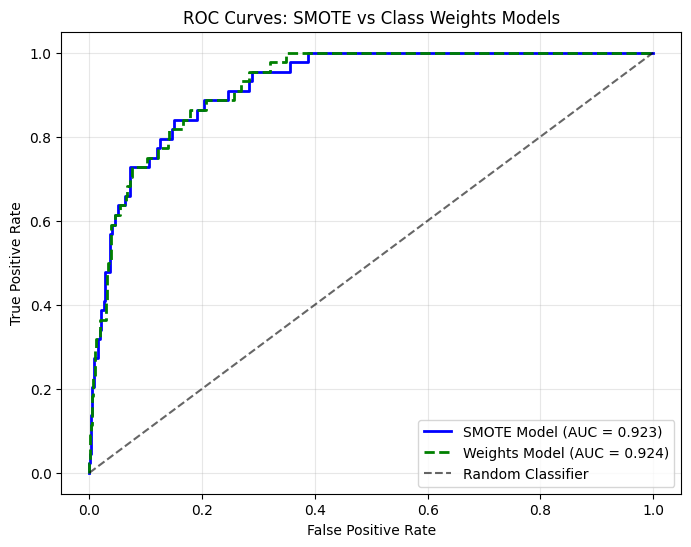

ROC-AUC SMOTE: 0.9225
ROC-AUC Weights: 0.9236


In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC metrics for both models
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_test_smote)
roc_auc_smote = roc_auc_score(y_test, y_proba_test_smote)

fpr_weights, tpr_weights, _ = roc_curve(y_test, y_proba_test_weights)
roc_auc_weights = roc_auc_score(y_test, y_proba_test_weights)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, 
         label=f'SMOTE Model (AUC = {roc_auc_smote:.3f})', 
         linewidth=2, color='blue')
plt.plot(fpr_weights, tpr_weights, 
         label=f'Weights Model (AUC = {roc_auc_weights:.3f})', 
         linewidth=2, color='green', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: SMOTE vs Class Weights Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"ROC-AUC SMOTE: {roc_auc_smote:.4f}")
print(f"ROC-AUC Weights: {roc_auc_weights:.4f}")

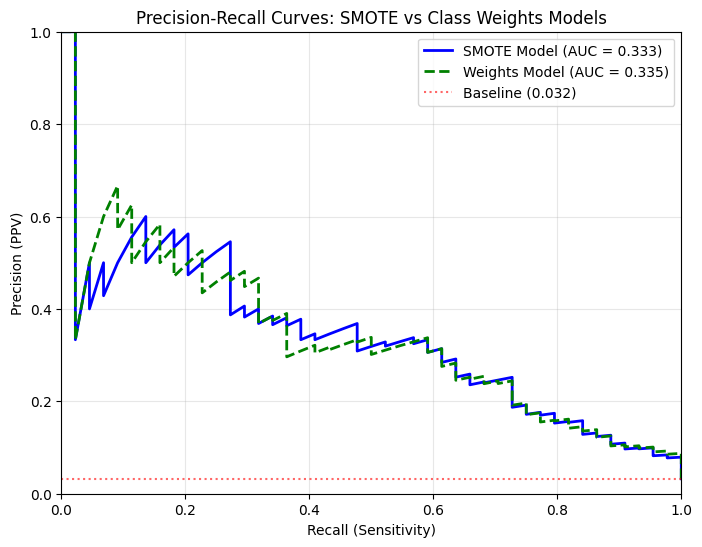

PR-AUC SMOTE: 0.3334
PR-AUC Weights: 0.3349
Baseline (Positive class ratio): 0.0323


In [73]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate PR metrics for both models
precision_smote, recall_smote, _ = precision_recall_curve(y_test, y_proba_test_smote)
pr_auc_smote = auc(recall_smote, precision_smote)

precision_weights, recall_weights, _ = precision_recall_curve(y_test, y_proba_test_weights)
pr_auc_weights = auc(recall_weights, precision_weights)

# Baseline (proportion of positive class)
baseline = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(8, 6))
plt.plot(recall_smote, precision_smote, 
         label=f'SMOTE Model (AUC = {pr_auc_smote:.3f})', 
         linewidth=2, color='blue')
plt.plot(recall_weights, precision_weights, 
         label=f'Weights Model (AUC = {pr_auc_weights:.3f})', 
         linewidth=2, color='green', linestyle='--')
plt.axhline(y=baseline, color='red', linestyle=':', 
           label=f'Baseline ({baseline:.3f})', alpha=0.6)

plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision (PPV)')
plt.title('Precision-Recall Curves: SMOTE vs Class Weights Models')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

print(f"PR-AUC SMOTE: {pr_auc_smote:.4f}")
print(f"PR-AUC Weights: {pr_auc_weights:.4f}")
print(f"Baseline (Positive class ratio): {baseline:.4f}")

We tune the threshold for each model in order to get the best F1 score because that gives a balance between precision and recall which is important in this scenario because we want our model to catch almost every company that has a possibility of going backrupt.

In [74]:
# Threshold tuning for both models
precisions_smote, recalls_smote, thresholds_smote = precision_recall_curve(y_test, y_proba_test_smote)
precisions_weights, recalls_weights, thresholds_weights = precision_recall_curve(y_test, y_proba_test_weights)

# Find thresholds that balance precision and recall using F1-score
f1_scores_smote = 2 * (precisions_smote * recalls_smote) / (precisions_smote + recalls_smote + 1e-8)
f1_scores_weights = 2 * (precisions_weights * recalls_weights) / (precisions_weights + recalls_weights + 1e-8)

# Find thresholds that maximize F1-score (balance precision and recall)
smote_threshold = thresholds_smote[np.argmax(f1_scores_smote[:-1])]
weights_threshold = thresholds_weights[np.argmax(f1_scores_weights[:-1])]

print("Optimal thresholds for balanced precision/recall (max F1-score):")
print(f"SMOTE: {smote_threshold:.3f}, Weights: {weights_threshold:.3f}")

# Apply tuned thresholds
y_pred_smote = (y_proba_test_smote > smote_threshold).astype(int)
y_pred_weights = (y_proba_test_weights > weights_threshold).astype(int)

print("\nTuned SMOTE (Balanced Precision/Recall):")
print(classification_report(y_test, y_pred_smote))
print("\nTuned Weights (Balanced Precision/Recall):")
print(classification_report(y_test, y_pred_weights))

Optimal thresholds for balanced precision/recall (max F1-score):
SMOTE: 0.880, Weights: 0.864

Tuned SMOTE (Balanced Precision/Recall):
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1320
           1       0.32      0.57      0.41        44

    accuracy                           0.95      1364
   macro avg       0.65      0.76      0.69      1364
weighted avg       0.96      0.95      0.95      1364


Tuned Weights (Balanced Precision/Recall):
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1320
           1       0.33      0.57      0.42        44

    accuracy                           0.95      1364
   macro avg       0.66      0.76      0.69      1364
weighted avg       0.96      0.95      0.96      1364



## Top Most Predictive Features Analysis and Model Evaluation.

Now lets dive into the analysis on the features that are most predictive in bankruptcy.

In [75]:
# Get coefficients from trained SMOTE model
coefficient_analysis = pd.DataFrame({
    'feature': selected_features,
    'coefficient': model_smote.coef_[0],
    'abs_coefficient': abs(model_smote.coef_[0])
})

# Sort by absolute coefficient (most impactful features)
coefficient_analysis = coefficient_analysis.sort_values('abs_coefficient', ascending=False)

print("Top Features by Model Impact:")
print(coefficient_analysis.head(10))

Top Features by Model Impact:
                               feature  coefficient  abs_coefficient
0           total debt/total net worth     1.704430         1.704430
1           total income/total expense    -1.338634         1.338634
3           revenue per share (yuan ¥)    -0.785742         0.785742
2  interest-bearing debt interest rate     0.613469         0.613469
4                 total expense/assets     0.592233         0.592233
5           allocation rate per person     0.387760         0.387760


Looking at the coefficients you can tell which features positively affects bankruptcy and which one does so negatively.

In [76]:
# Descriptive stats for top features by bankruptcy status
print("=== HEALTHY COMPANIES (Bankrupt? = 0) ===")
healthy_stats = df[df['bankrupt?'] == 0][['total debt/total net worth', 
                                         'total income/total expense',
                                         'revenue per share (yuan ¥)', 
                                         'interest-bearing debt interest rate',
                                         'total expense/assets',
                                         'allocation rate per person',
                                         'cash flow per share']].describe()
print(healthy_stats)

print("\n=== BANKRUPT COMPANIES (Bankrupt? = 1) ===")
bankrupt_stats = df[df['bankrupt?'] == 1][['total debt/total net worth', 
                                          'total income/total expense',
                                          'revenue per share (yuan ¥)', 
                                          'interest-bearing debt interest rate',
                                          'total expense/assets',
                                          'allocation rate per person',
                                          'cash flow per share']].describe()
print(bankrupt_stats)

=== HEALTHY COMPANIES (Bankrupt? = 0) ===
       total debt/total net worth  total income/total expense  \
count                6.599000e+03                 6599.000000   
mean                 4.037733e+06                    0.002565   
std                  1.657874e+08                    0.012292   
min                  0.000000e+00                    0.000000   
25%                  2.932272e-03                    0.002243   
50%                  5.376668e-03                    0.002343   
75%                  8.906702e-03                    0.002498   
max                  9.940000e+09                    1.000000   

       revenue per share (yuan ¥)  interest-bearing debt interest rate  \
count                6.599000e+03                         6.599000e+03   
mean                 1.372935e+06                         1.690392e+07   
std                  5.256149e+07                         1.098875e+08   
min                  0.000000e+00                         0.000000e+00   
25

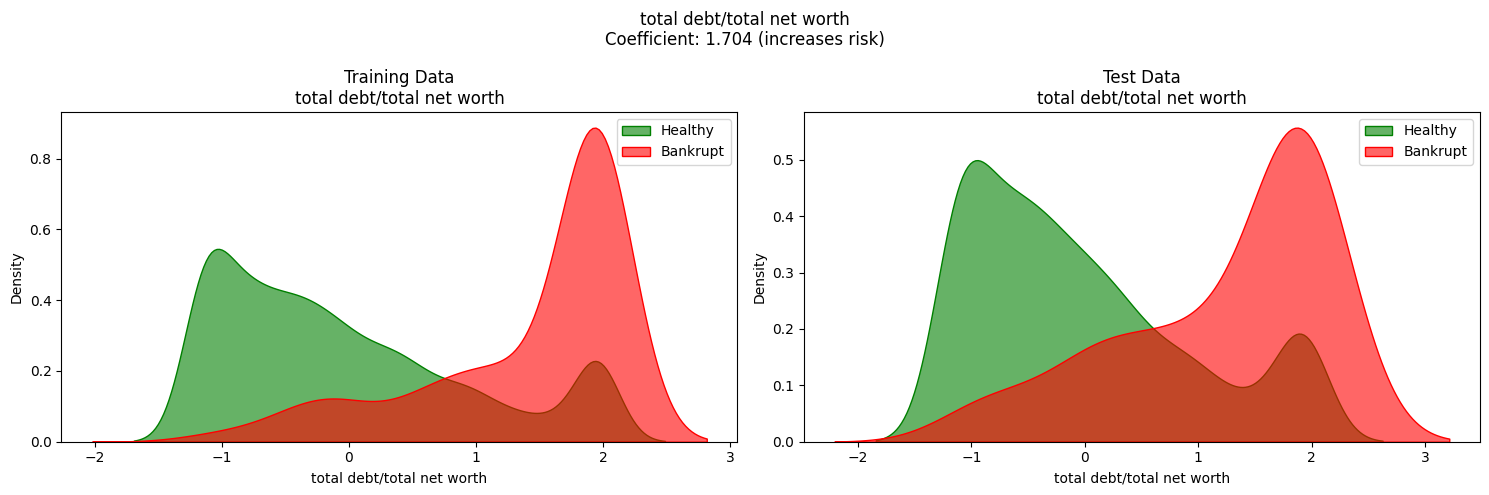

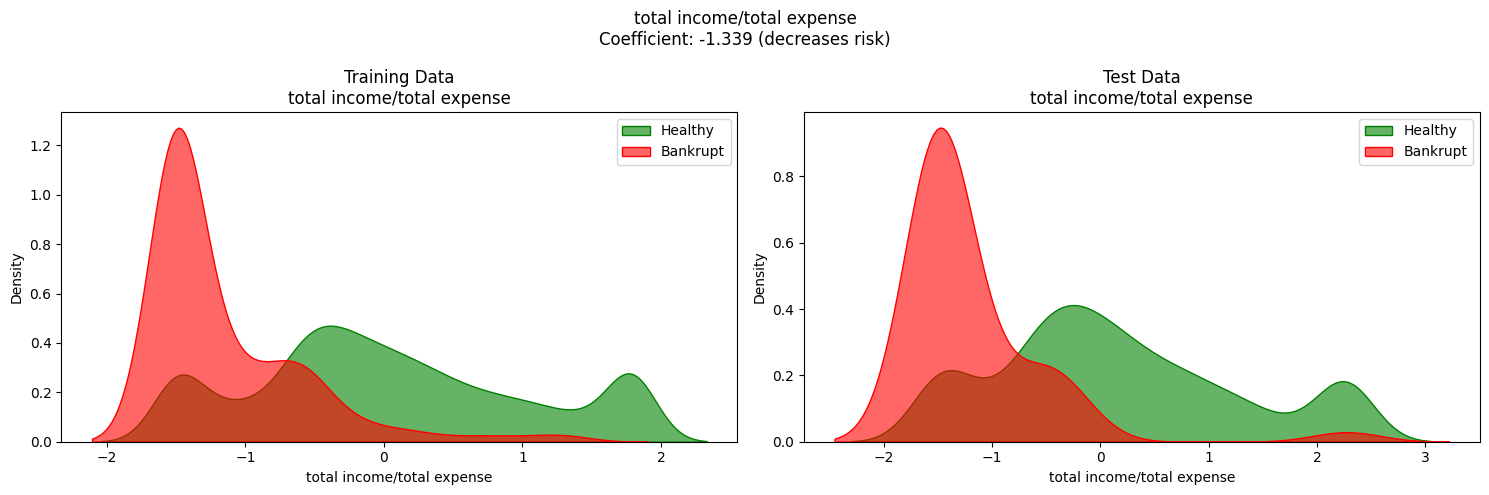

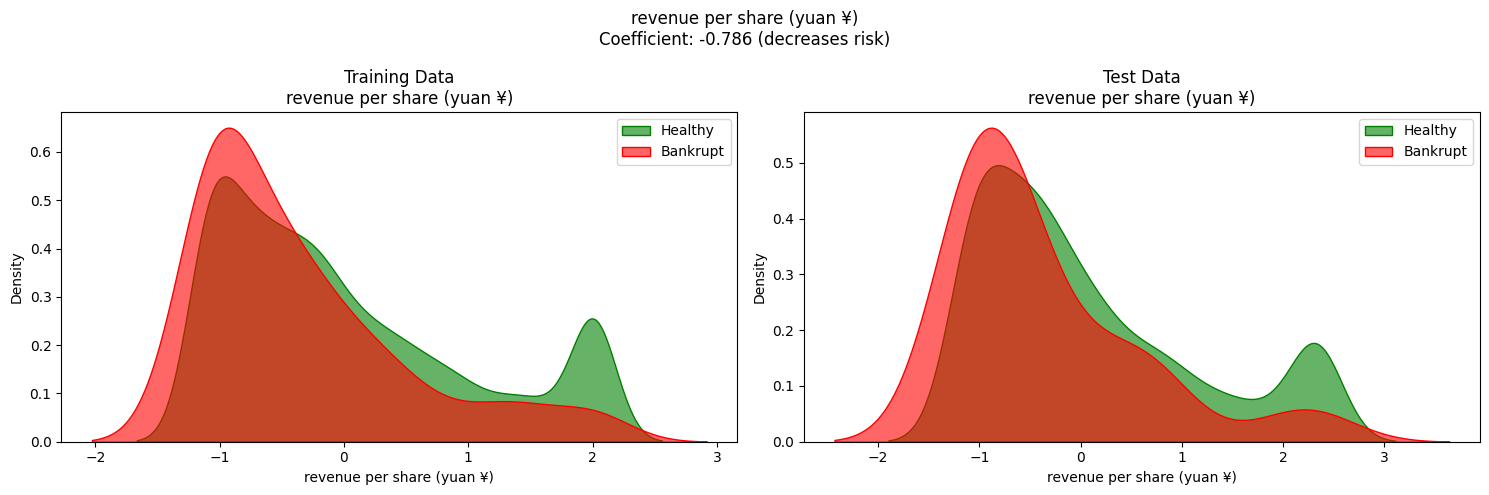

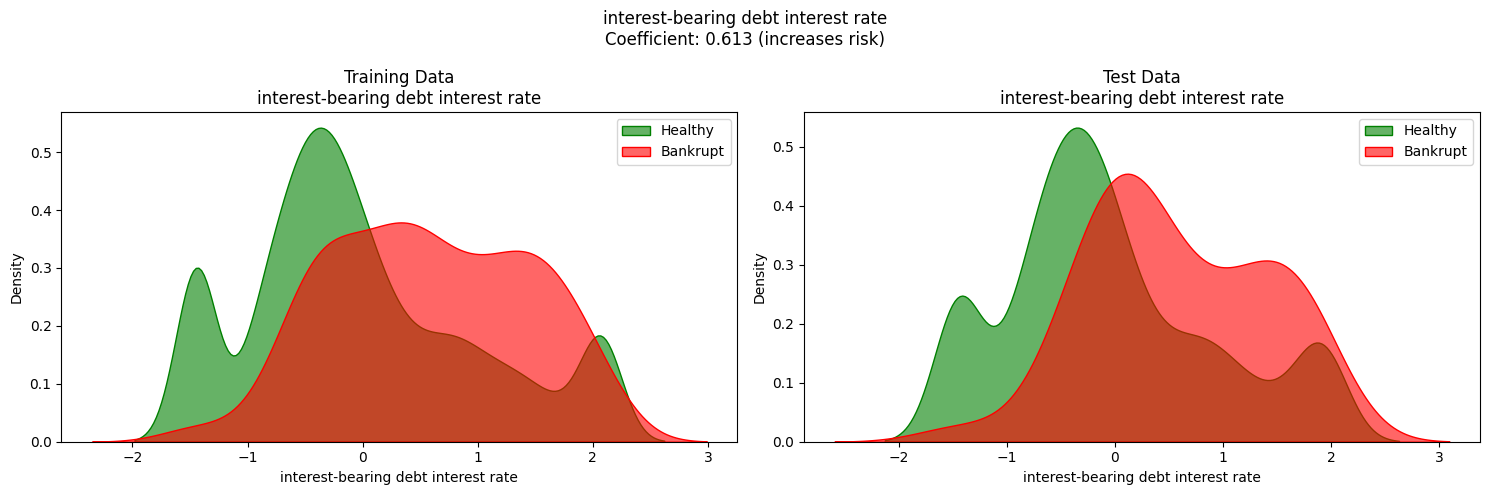

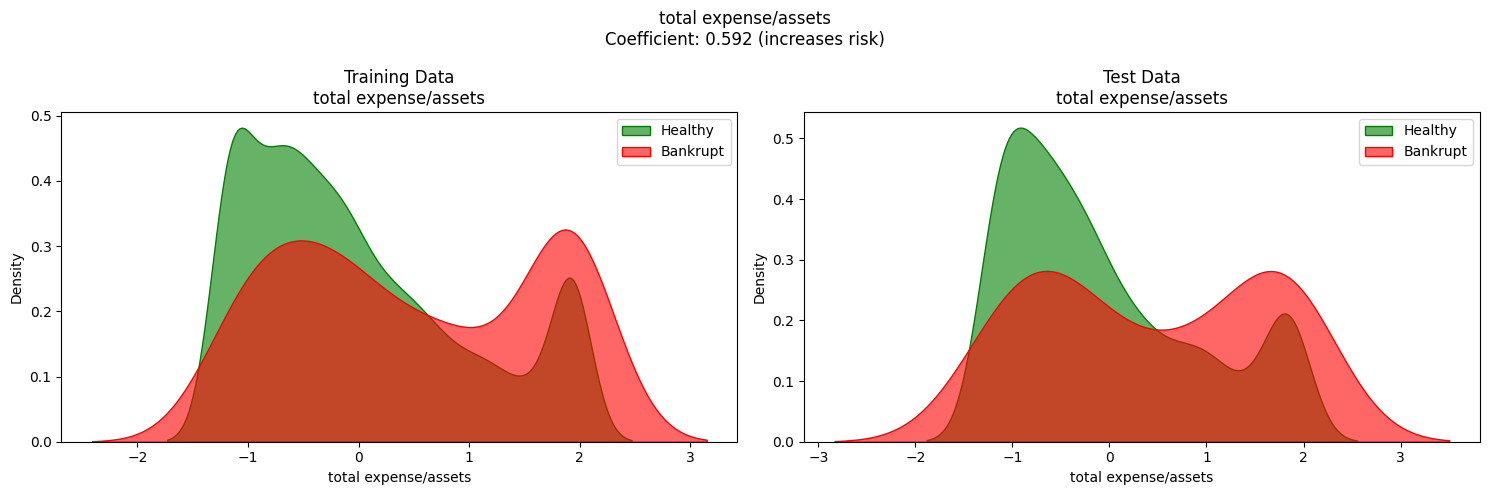

In [77]:
healthy_mask = (y_train == 0)
bankrupt_mask = (y_train == 1)

# KDE plots for top 5 features (Using both train and test for comparison)
top_5_features = coefficient_analysis.head(5)['feature'].tolist()

for feature in top_5_features:
    coef = coefficient_analysis[coefficient_analysis['feature'] == feature]['coefficient'].values[0]
    direction = "increases risk" if coef > 0 else "decreases risk"
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Training Data
    sns.kdeplot(data=X_train_weights_reduced[healthy_mask][feature], 
                label='Healthy', fill=True, alpha=0.6, color='green', ax=ax1)
    sns.kdeplot(data=X_train_weights_reduced[bankrupt_mask][feature], 
                label='Bankrupt', fill=True, alpha=0.6, color='red', ax=ax1)
    ax1.set_title(f'Training Data\n{feature}')
    ax1.legend()
    
    # Test Data  
    sns.kdeplot(data=X_test_weights_reduced[y_test == 0][feature],
                label='Healthy', fill=True, alpha=0.6, color='green', ax=ax2)
    sns.kdeplot(data=X_test_weights_reduced[y_test == 1][feature],
                label='Bankrupt', fill=True, alpha=0.6, color='red', ax=ax2)
    ax2.set_title(f'Test Data\n{feature}')
    ax2.legend()
    
    plt.suptitle(f'{feature}\nCoefficient: {coef:.3f} ({direction})')
    plt.tight_layout()
    plt.show()

In [78]:
# After SMOTE model evaluation, save the values
f2_smote = f2_test
pr_auc_smote = pr_auc

# After Weights model evaluation, save the values  
f2_weights = f2_test
pr_auc_weights = pr_auc

In [79]:
# Compare both models side-by-side (with tuned thresholds)
print("=== FINAL MODEL COMPARISON (TUNED THRESHOLDS) ===")
print(f"{'Metric':<25} {'SMOTE':<10} {'Class Weights':<10}")
print("-" * 50)
print(f"{'Test Accuracy':<25} {accuracy_score(y_test, y_pred_smote):.4f}    {accuracy_score(y_test, y_pred_weights):.4f}")
print(f"{'Test ROC-AUC':<25} {roc_auc_score(y_test, y_proba_test_smote):.4f}    {roc_auc_score(y_test, y_proba_test_weights):.4f}")
print(f"{'Precision-Recall AUC':<25} {pr_auc_smote:.4f}    {pr_auc_weights:.4f}")
print(f"{'F2-Score (Bankrupt)':<25} {f2_smote:.4f}    {f2_weights:.4f}")
print(f"{'Precision (Bankrupt)':<25} {classification_report(y_test, y_pred_smote, output_dict=True)['1']['precision']:.4f}    {classification_report(y_test, y_pred_weights, output_dict=True)['1']['precision']:.4f}")
print(f"{'Recall (Bankrupt)':<25} {classification_report(y_test, y_pred_smote, output_dict=True)['1']['recall']:.4f}    {classification_report(y_test, y_pred_weights, output_dict=True)['1']['recall']:.4f}")

=== FINAL MODEL COMPARISON (TUNED THRESHOLDS) ===
Metric                    SMOTE      Class Weights
--------------------------------------------------
Test Accuracy             0.9479    0.9487
Test ROC-AUC              0.9225    0.9236
Precision-Recall AUC      0.3349    0.3349
F2-Score (Bankrupt)       0.4511    0.4511
Precision (Bankrupt)      0.3247    0.3289
Recall (Bankrupt)         0.5682    0.5682


In [80]:
# Business insights from top features
print("\n=== BUSINESS INSIGHTS ===")
print("Top factors influencing bankruptcy risk:")
for i, feature in enumerate(top_5_features, 1):
    coef = coefficient_analysis[coefficient_analysis['feature'] == feature]['coefficient'].values[0]
    effect = "Higher bankruptcy risk" if coef > 0 else "Lower bankruptcy risk"
    print(f"{i}. {feature}: {effect}")


=== BUSINESS INSIGHTS ===
Top factors influencing bankruptcy risk:
1. total debt/total net worth: Higher bankruptcy risk
2. total income/total expense: Lower bankruptcy risk
3. revenue per share (yuan ¥): Lower bankruptcy risk
4. interest-bearing debt interest rate: Higher bankruptcy risk
5. total expense/assets: Higher bankruptcy risk


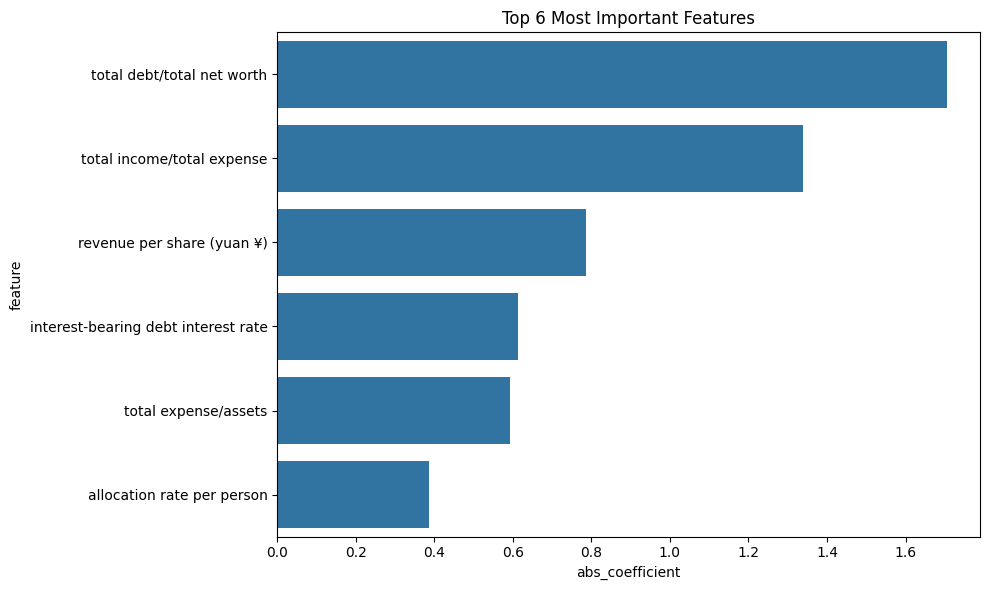

In [81]:
# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficient_analysis.head(6), x='abs_coefficient', y='feature')
plt.title('Top 6 Most Important Features')
plt.tight_layout()
plt.show()